# US Doctor Database Analysis - Sai Rohini Godavarthi


## Goal

The purpose of this project is to conduct a comprehensive analysis of healthcare provider data sourced from CMS NPI files. By examining CSV files in this dataset, we aim to understand provider trends, practice areas, and deactivation patterns. This analysis will enable us to visualize data distribution, focusing on areas such as provider practices, taxonomy, and geographic distribution, represented through various charts like pie charts.

## Data Source



The dataset is sourced from the CMS **National Plan and Provider Enumeration System (NPPES)**, specifically from the .zip files available at NPI Files. The data includes:

**Monthly Full Replacement Files:** These provide a complete set of NPI records.  
**Deactivation Files:** Contain records of NPIs that have been deactivated due to reasons like job transitions, retirement, or death.

# Import Libraries

In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt

import warnings

# Suppress SettingWithCopyWarning
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")


/Users/rohini/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Dataset 1:

In [2]:
# Read only the header row
header = pd.read_csv("npidata_pfile_20050523-20241013.csv", nrows=0)

# Get column and row count
num_columns = len(header.columns)

# Using open() to count lines without loading data
with open("npidata_pfile_20050523-20241013.csv", "r") as file:
    row_count = sum(1 for line in file) - 1  # Subtract 1 for header

print("Number of rows:", row_count)
print("Number of columns:", num_columns)


Number of rows: 8576349
Number of columns: 330


## Overview


The dataset, provided as npidata_pfile_20050523-20241013.csv, contains comprehensive information on healthcare providers from the National Plan and Provider Enumeration System (NPPES). The file size is approximately 10 GB, comprising a substantial volume of records and a broad range of data attributes.

**Number of Rows:** 8,576,349 (representing individual provider records)  
**Number of Columns:** 330 (capturing various aspects of provider information)


Given the extensive nature of this dataset, with 330 distinct attributes covering a wide array of provider-related data, we have opted to focus on a select subset of columns. This selection is based on the analysis goals and relevant data fields that directly support our objectives.

In [3]:
# Define file path
file_path = 'npidata_pfile_20050523-20241013.csv'

# Define the columns you want to load
columns_to_load = [
    'NPI', 
    'Provider Credential Text', 
    'Provider First Name', 
    'Provider Last Name (Legal Name)', 
    'Provider First Line Business Mailing Address', 
    'Provider Business Mailing Address City Name', 
    'Provider Business Mailing Address State Name',
    'Provider Business Mailing Address Postal Code', 
]

# Load only the specified columns
filtered_data = pd.read_csv(file_path, usecols=columns_to_load)


/var/folders/wz/2r9dmd592pg7wwm18rccbml80000gn/T/ipykernel_11799/913665396.py:17: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_data = pd.read_csv(file_path, usecols=columns_to_load)


In [4]:
filtered_data

,NPI,Provider Last Name (Legal Name),Provider First Name,Provider Credential Text,Provider First Line Business Mailing Address,Provider Business Mailing Address City Name,Provider Business Mailing Address State Name,Provider Business Mailing Address Postal Code
0,1679576722,WIEBE,DAVID,M.D.,PO BOX 2168,KEARNEY,NE,688482168.0
1,1588667638,PILCHER,WILLIAM,MD,1824 KING STREET,JACKSONVILLE,FL,322044736.0
2,1497758544,NaN,NaN,NaN,3418 VILLAGE DR,FAYETTEVILLE,NC,283044552.0
3,1306849450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1215930367,GRESSOT,LAURENT,M.D.,17323 RED OAK DR,HOUSTON,TX,770901243.0
...,...,...,...,...,...,...,...,...
8576344,1578383782,ZHOU,HANWEI,NaN,2475 32ND AVE S STE 1,GRAND FORKS,ND,582013606
8576345,1104646314,SEGNOU,ASHLEY,NP-C,1671 VERNON BLVD,DECATUR,GA,300352555
8576346,1013737220,DELFIN,KAITLIN,RN,1345 SE 175TH PL,PORTLAND,OR,972334748
8576347,1922828136,WESTON,ANTWONETTE,NaN,1005 GILMORE ST,WAYCROSS,GA,315012147


## Removing Punctuation from Provider Credential Text

To ensure uniformity and simplify analysis, we perform a punctuation removal step on the Provider Credential Text field, which contains providers' qualifications (e.g., "M.D.", "Ph.D.", "D.O.").

In [5]:
# Remove punctuation from 'Provider Credential Text' column
filtered_data['Provider Credential Text'] = filtered_data['Provider Credential Text'].str.replace(f"[{string.punctuation}]", "", regex=True)

# Verify the result
print(filtered_data['Provider Credential Text'].value_counts())

Provider Credential Text
MD                   1046162
DDS                   156420
DO                    133364
LCSW                  124137
PHARMD                119734
                      ...   
HEALTH PROFESSION          1
OTRLRN                     1
REGIONAL CASE MGR          1
LPT ATP                    1
ADTSIII                    1
Name: count, Length: 121049, dtype: int64


In [6]:
filtered_data

,NPI,Provider Last Name (Legal Name),Provider First Name,Provider Credential Text,Provider First Line Business Mailing Address,Provider Business Mailing Address City Name,Provider Business Mailing Address State Name,Provider Business Mailing Address Postal Code
0,1679576722,WIEBE,DAVID,MD,PO BOX 2168,KEARNEY,NE,688482168.0
1,1588667638,PILCHER,WILLIAM,MD,1824 KING STREET,JACKSONVILLE,FL,322044736.0
2,1497758544,NaN,NaN,NaN,3418 VILLAGE DR,FAYETTEVILLE,NC,283044552.0
3,1306849450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1215930367,GRESSOT,LAURENT,MD,17323 RED OAK DR,HOUSTON,TX,770901243.0
...,...,...,...,...,...,...,...,...
8576344,1578383782,ZHOU,HANWEI,NaN,2475 32ND AVE S STE 1,GRAND FORKS,ND,582013606
8576345,1104646314,SEGNOU,ASHLEY,NPC,1671 VERNON BLVD,DECATUR,GA,300352555
8576346,1013737220,DELFIN,KAITLIN,RN,1345 SE 175TH PL,PORTLAND,OR,972334748
8576347,1922828136,WESTON,ANTWONETTE,NaN,1005 GILMORE ST,WAYCROSS,GA,315012147


# Question 1:
    
# Read all the monthly doctor data and sort doctors with different practices.

In [7]:
# Count the occurrences of each unique credential in 'Provider Credential Text'
credential_counts = filtered_data['Provider Credential Text'].value_counts()


In [8]:
credential_counts

Provider Credential Text
MD                   1046162
DDS                   156420
DO                    133364
LCSW                  124137
PHARMD                119734
                      ...   
HEALTH PROFESSION          1
OTRLRN                     1
REGIONAL CASE MGR          1
LPT ATP                    1
ADTSIII                    1
Name: count, Length: 121049, dtype: int64

In [9]:
# Get the top 10 credentials
top_10_credentials = credential_counts.head(10)
print("Top 10 Credential Types:\n", top_10_credentials)

# Get the bottom 10 credentials
bottom_10_credentials = credential_counts.tail(10)
print("\nBottom 10 Credential Types:\n", bottom_10_credentials)


Top 10 Credential Types:
 Provider Credential Text
MD        1046162
DDS        156420
DO         133364
LCSW       124137
PHARMD     119734
RN         111337
PAC        110356
DC          91662
PT          90254
PHD         78210
Name: count, dtype: int64

Bottom 10 Credential Types:
 Provider Credential Text
CAMT CAMQ CDDONA     1
ODT OTRL CHT         1
PMHDNP APRN RN       1
BO ABO NCLE          1
MSC LCPC CEDS        1
HEALTH PROFESSION    1
OTRLRN               1
REGIONAL CASE MGR    1
LPT ATP              1
ADTSIII              1
Name: count, dtype: int64


# Question 2

# Remove the doctors from the deactivation zip

## Dataset 2:

The deactivated NPI records are sourced from the NPPES Deactivation File, which provides information about healthcare providers whose NPIs have been deactivated.

Deactivation File Format: 

The file contains two columns:  
**NPI:** The unique identifier for each provider (10-digit number).   
**NPPES Deactivation Date:** The date when the NPI was deactivated. 

In [10]:
deactivated_npi=pd.read_excel(r'NPPES Deactivated NPI Report 20241014.xlsx')

/Users/rohini/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [11]:
deactivated_npi

,NPPES Deactivated Records as of Oct 14 2024,Unnamed: 1
0,NPI,NPPES Deactivation Date
1,1134768526,10/14/2024
2,1740769678,10/13/2024
3,1881278935,10/13/2024
4,1053330415,10/13/2024
...,...,...
289369,1023011483,05/31/2005
289370,1033112719,05/27/2005
289371,1396748018,05/27/2005
289372,1871596908,05/23/2005


## Data Cleaning: Renaming Columns for Clarity

In order to ensure clarity and consistency in our analysis, we have renamed the columns of the deactivated NPI data. The original dataset contained columns with ambiguous or unclear names, which were updated to more descriptive labels. This step is essential for understanding and working with the data effectively.

**Original Column Names:**

**NPI:** Represents the unique National Provider Identifier (NPI) of deactivated providers.
**Unnamed: 1:** Initially had no label but contained the deactivation date.
        
**Renamed Columns:**

**NPI:** The same, retained as the identifier for the provider.
**NPPES Deactivation Date:** The column originally named "Unnamed: 1" was renamed to more accurately reflect its contents, which specify the date on which the provider’s NPI was deactivated.

In [12]:
deactivated_npi.columns = [deactivated_npi.iloc[0, 0], deactivated_npi.iloc[0, 1]]  # Use values from row 1, column 1 for headers
deactivated_npi = deactivated_npi.drop([0, 0])  # Drop the first two rows

deactivated_npi.reset_index(drop=True, inplace=True)

deactivated_npi.head()

,NPI,NPPES Deactivation Date
0,1134768526,10/14/2024
1,1740769678,10/13/2024
2,1881278935,10/13/2024
3,1053330415,10/13/2024
4,1194594572,10/13/2024


## Merging Deactivated NPI Data with Active Providers

In [13]:
# Ensure NPI columns are strings to avoid potential matching issues
filtered_data['NPI'] = filtered_data['NPI'].astype(str)
deactivated_npi['NPI'] = deactivated_npi['NPI'].astype(str)

# Merge the two datasets on the NPI column
merged_data = filtered_data.merge(deactivated_npi, on='NPI', how='left')

# Separate into matching and non-matching datasets
matched_data = merged_data[merged_data['NPPES Deactivation Date'].notna()]
unmatched_data = merged_data[merged_data['NPPES Deactivation Date'].isna()]

# Display the results
print("Matched Data (Deactivated NPIs):")
print(matched_data)

print("\nUnmatched Data (Active NPIs):")
print(unmatched_data)


Matched Data (Deactivated NPIs):
                NPI Provider Last Name (Legal Name) Provider First Name  \
3        1306849450                             NaN                 NaN   
35       1891798849                             NaN                 NaN   
52       1770586729                             NaN                 NaN   
89       1386647311                             NaN                 NaN   
110      1427051457                             NaN                 NaN   
...             ...                             ...                 ...   
8567601  1073332193                             NaN                 NaN   
8568253  1518786565                             NaN                 NaN   
8570433  1376362129                             NaN                 NaN   
8570932  1154140705                             NaN                 NaN   
8573516  1538989959                             NaN                 NaN   

        Provider Credential Text Provider First Line Business Mail

To identify providers with deactivated NPIs, the following steps were performed:

**Ensure Consistency:** Both the filtered_data and deactivated_npi datasets had their NPI columns converted to strings to avoid potential matching issues.  

**Merge Datasets:** The filtered_data and deactivated_npi datasets were merged on the NPI column using a left join. This includes all active providers and the deactivation date for those who have been deactivated.

**Separate Data:**  
**Matched Data:** Providers with a deactivation date were identified as deactivated (using .notna()).  
**Unmatched Data:** Providers without a deactivation date were considered active (using .isna()).  
    

In [14]:
matched_data

,NPI,Provider Last Name (Legal Name),Provider First Name,Provider Credential Text,Provider First Line Business Mailing Address,Provider Business Mailing Address City Name,Provider Business Mailing Address State Name,Provider Business Mailing Address Postal Code,NPPES Deactivation Date
3,1306849450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03/03/2021
35,1891798849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/13/2017
52,1770586729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/03/2017
89,1386647311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/28/2020
110,1427051457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/08/2014
...,...,...,...,...,...,...,...,...,...
8567601,1073332193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/07/2024
8568253,1518786565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/07/2024
8570433,1376362129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/08/2024
8570932,1154140705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/09/2024


In [15]:
unmatched_data

,NPI,Provider Last Name (Legal Name),Provider First Name,Provider Credential Text,Provider First Line Business Mailing Address,Provider Business Mailing Address City Name,Provider Business Mailing Address State Name,Provider Business Mailing Address Postal Code,NPPES Deactivation Date
0,1679576722,WIEBE,DAVID,MD,PO BOX 2168,KEARNEY,NE,688482168.0,NaN
1,1588667638,PILCHER,WILLIAM,MD,1824 KING STREET,JACKSONVILLE,FL,322044736.0,NaN
2,1497758544,NaN,NaN,NaN,3418 VILLAGE DR,FAYETTEVILLE,NC,283044552.0,NaN
4,1215930367,GRESSOT,LAURENT,MD,17323 RED OAK DR,HOUSTON,TX,770901243.0,NaN
5,1023011178,NaN,NaN,NaN,414 S JEFFERSON ST,NAPA,CA,945594515.0,NaN
...,...,...,...,...,...,...,...,...,...
8576344,1578383782,ZHOU,HANWEI,NaN,2475 32ND AVE S STE 1,GRAND FORKS,ND,582013606,NaN
8576345,1104646314,SEGNOU,ASHLEY,NPC,1671 VERNON BLVD,DECATUR,GA,300352555,NaN
8576346,1013737220,DELFIN,KAITLIN,RN,1345 SE 175TH PL,PORTLAND,OR,972334748,NaN
8576347,1922828136,WESTON,ANTWONETTE,NaN,1005 GILMORE ST,WAYCROSS,GA,315012147,NaN


The final result is two separate datasets:    

**Matched Data:** Providers with deactivated NPIs of 289373 rows × 9 columns.   
**Unmatched Data:** Providers with active NPIs of 8286976 rows × 9 columns.

# Question 3
    
# After removal, get counts of all the active doctors based on the practices. 

After filtering out the deactivated NPIs, we need to count the active doctors based on their practice (credential type) to answer the above question.

We have already merged the datasets (filtered_data and deactivated_npi), and separated active (unmatched) and deactivated (matched) NPIs.  

Now, we focus on the unmatched data (i.e., active providers).

Using the Provider Credential Text column, we count the number of active doctors based on their practice type (e.g., "MD", "RN").

In [16]:
# Filter out active doctors (unmatched data)
active_doctors = unmatched_data

# Count the occurrences of each practice/credential type in 'Provider Credential Text'
active_doctors_counts = active_doctors['Provider Credential Text'].value_counts()

# Display the counts of active doctors based on practices
print("Active Doctors Count by Practice Type:")
print(active_doctors_counts)


Active Doctors Count by Practice Type:
Provider Credential Text
MD                   1046161
DDS                   156420
DO                    133364
LCSW                  124137
PHARMD                119734
                      ...   
HEALTH PROFESSION          1
OTRLRN                     1
REGIONAL CASE MGR          1
LPT ATP                    1
ADTSIII                    1
Name: count, Length: 121049, dtype: int64


In [17]:
# Get the top 10 active doctors counts
top_10_active_doctors_counts = active_doctors_counts.head(10)
print("Top 10 active doctors counts:\n", top_10_active_doctors_counts)

Top 10 active doctors counts:
 Provider Credential Text
MD        1046161
DDS        156420
DO         133364
LCSW       124137
PHARMD     119734
RN         111337
PAC        110356
DC          91662
PT          90254
PHD         78210
Name: count, dtype: int64


# Question 4

# Use a Piechart or any visualization to show the percentage other any other charts you think that can visualize better.

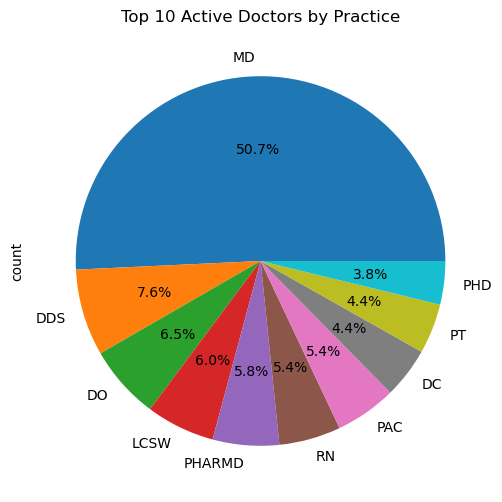

In [24]:
#Visualization of active doctors by practices
plt.figure(figsize=(10, 6))
active_doctors_counts.head(10).plot(kind='pie', autopct='%1.1f%%', color='skyblue', title='Top 10 Active Doctors by Practice')
plt.show()

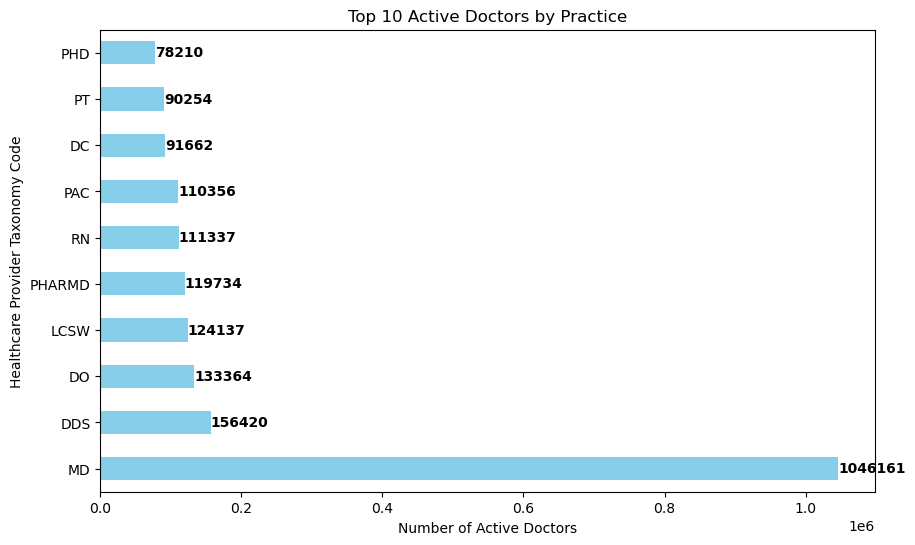

In [19]:
plt.figure(figsize=(10, 6))
ax=active_doctors_counts.head(10).plot(kind='barh', color='skyblue', title='Top 10 Active Doctors by Practice')

# Add count labels on the bars
for index, value in enumerate(active_doctors_counts.head(10)):
    ax.text(value, index, str(value), va='center', ha='left', color='black', fontweight='bold')

plt.xlabel('Number of Active Doctors')
plt.ylabel('Healthcare Provider Taxonomy Code')
plt.show()

To better understand the distribution of healthcare provider specialties, I visualized the number of doctors in each practice category using both a bar chart and a pie chart. The bar chart highlights the counts of doctors across different specialties, while the pie chart displays their relative percentages. For instance, the highest count is for MDs (1,046,161), followed by DDS (156,420) and DO (133,364). This allows for an easy comparison of the distribution of doctor specialties.

**Bar Chart:** Displays the total number of doctors in each specialty, making it easy to compare the counts across categories.  

**Pie Chart:** Visualizes the percentage of each specialty in relation to the total, providing a clear picture of the distribution.  

# Question 5

# Using Pandas to see if the following doctors are in the NPI data.   

##### Doctor information for Testing,  

##### Elizabeth Botham, MD, 1 Seymour St 6th Floor, Montclair, NJ 07042  
##### Michael Costanzo, APN, 890 Mountain Ave 3rd Floor, New Providence, NJ 07974  
##### Jenna Presto, MD, 2 Brighton Rd, Clifton, NJ 07012  
##### Daniel Roling, MD, 6 Lancaster Ave, Wynnewood, PA 19096  
##### Marlyn Wu, DO, 2 Brighton Road, 2nd Floor, Clifton, NJ, (973) 792-8455  
##### Robert Kantor, MD, 1255 Broad St., 2nd Floor, Clifton, NJ, (973) 685-5736  


# Batch Search for a List of Doctors

In [25]:
# Convert NPI column to string in unmatched_data
unmatched_data['NPI'] = unmatched_data['NPI'].astype(str)

# Define the doctors to search for
doctors = [
    {"first_name": "ELIZABETH", "last_name": "BOTHAM"},
    {"first_name": "MICHAEL", "last_name": "COSTANZO"},
    {"first_name": "JENNA", "last_name": "PRESTO"},
    {"first_name": "DANIEL", "last_name": "ROLING"},
    {"first_name": "MARLYN", "last_name": "WU"},
    {"first_name": "ROBERT", "last_name": "KANTOR"}
]

# Standardize name columns in unmatched_data
unmatched_data['Provider First Name'] = unmatched_data['Provider First Name'].str.strip().str.upper()
unmatched_data['Provider Last Name (Legal Name)'] = unmatched_data['Provider Last Name (Legal Name)'].str.strip().str.upper()

# Loop through each doctor in the list and search for matches in unmatched_data
for doctor in doctors:
    first_name = doctor["first_name"]
    last_name = doctor["last_name"]
    
    # Search within unmatched_data for the specified first and last name
    doctor_found = unmatched_data[
        (unmatched_data['Provider First Name'] == first_name) &
        (unmatched_data['Provider Last Name (Legal Name)'] == last_name)
    ]
    
    # Output the result for each doctor
    if not doctor_found.empty:
        print(f"Doctor {first_name} {last_name} found in NPI dataset:")
        print(doctor_found[['NPI', 'Provider First Name', 'Provider Last Name (Legal Name)', 
                            'Provider Credential Text', 'Provider First Line Business Mailing Address', 
                            'Provider Business Mailing Address City Name', 'Provider Business Mailing Address State Name']])
    else:
        print(f"Doctor {first_name} {last_name} not found in NPI dataset.")


/var/folders/wz/2r9dmd592pg7wwm18rccbml80000gn/T/ipykernel_11799/1177322414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unmatched_data['NPI'] = unmatched_data['NPI'].astype(str)
/var/folders/wz/2r9dmd592pg7wwm18rccbml80000gn/T/ipykernel_11799/1177322414.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unmatched_data['Provider First Name'] = unmatched_data['Provider First Name'].str.strip().str.upper()
/var/folders/wz/2r9dmd592pg7wwm18rccbml80000gn/T/ipykernel_11799/1177322414.py:16: SettingWithC

Doctor ELIZABETH BOTHAM found in NPI dataset:
                NPI Provider First Name Provider Last Name (Legal Name)  \
3716720  1669732467           ELIZABETH                          BOTHAM   

        Provider Credential Text Provider First Line Business Mailing Address  \
3716720                       MD                            1 DIAMOND HILL RD   

        Provider Business Mailing Address City Name  \
3716720                            BERKELEY HEIGHTS   

        Provider Business Mailing Address State Name  
3716720                                           NJ  
Doctor MICHAEL COSTANZO found in NPI dataset:
                NPI Provider First Name Provider Last Name (Legal Name)  \
7179009  1245984665             MICHAEL                        COSTANZO   

        Provider Credential Text Provider First Line Business Mailing Address  \
7179009                       NP                            1 DIAMOND HILL RD   

        Provider Business Mailing Address City Name  \
7179

In [21]:
# Ensure NPI columns are strings to avoid potential matching issues
unmatched_data['NPI'] = unmatched_data['NPI'].astype(str)

# Standardize columns in the dataset
unmatched_data['Provider First Name'] = unmatched_data['Provider First Name'].str.strip().str.upper()
unmatched_data['Provider Last Name (Legal Name)'] = unmatched_data['Provider Last Name (Legal Name)'].str.strip().str.upper()

# List of doctors to check
doctors = [
    {"first_name": "ELIZABETH", "last_name": "BOTHAM"},
    {"first_name": "MICHAEL", "last_name": "COSTANZO"},
    {"first_name": "JENNA", "last_name": "PRESTO"},
    {"first_name": "DANIEL", "last_name": "ROLING"},
    {"first_name": "MARLYN", "last_name": "WU"},
    {"first_name": "ROBERT", "last_name": "KANTOR"}
]

# Initialize an empty list to store the matched records
matched_doctors = []

# Loop through each doctor in the list and search for matches
for doctor in doctors:
    first_name = doctor["first_name"]
    last_name = doctor["last_name"]
    
    # Search for records that contain the specified first and last name in the filtered_data
    doctor_found = unmatched_data[
        (unmatched_data['Provider First Name'] == first_name) &
        (unmatched_data['Provider Last Name (Legal Name)'] == last_name)
    ]
    
    # If a match is found, add the results to the matched_doctors list
    if not doctor_found.empty:
        matched_doctors.append(doctor_found[['NPI', 'Provider First Name', 'Provider Last Name (Legal Name)', 
                                             'Provider Credential Text', 'Provider First Line Business Mailing Address', 
                                             'Provider Business Mailing Address City Name', 'Provider Business Mailing Address State Name']])

# Combine all the matched doctor DataFrames into a single DataFrame
final_matched_df = pd.concat(matched_doctors, ignore_index=True)


/var/folders/wz/2r9dmd592pg7wwm18rccbml80000gn/T/ipykernel_11799/1377451403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unmatched_data['NPI'] = unmatched_data['NPI'].astype(str)
/var/folders/wz/2r9dmd592pg7wwm18rccbml80000gn/T/ipykernel_11799/1377451403.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unmatched_data['Provider First Name'] = unmatched_data['Provider First Name'].str.strip().str.upper()
/var/folders/wz/2r9dmd592pg7wwm18rccbml80000gn/T/ipykernel_11799/1377451403.py:6: SettingWithCop

In [22]:
final_matched_df

,NPI,Provider First Name,Provider Last Name (Legal Name),Provider Credential Text,Provider First Line Business Mailing Address,Provider Business Mailing Address City Name,Provider Business Mailing Address State Name
0,1669732467,ELIZABETH,BOTHAM,MD,1 DIAMOND HILL RD,BERKELEY HEIGHTS,NJ
1,1245984665,MICHAEL,COSTANZO,NP,1 DIAMOND HILL RD,BERKELEY HEIGHTS,NJ
2,1134654221,JENNA,PRESTO,NaN,100 E LANCASTER AVE,WYNNEWOOD,PA
3,1285659425,DANIEL,ROLING,MD,825 OLD LANCASTER RD,BRYN MAWR,PA
4,1386138675,MARLYN,WU,DO,1 DIAMOND HILL RD,BERKELEY HEIGHTS,NJ
5,1790774180,ROBERT,KANTOR,MD,1400 JACKSON ST,DENVER,CO
6,1972575561,ROBERT,KANTOR,MD,409 S 2ND ST STE 2F,HARRISBURG,PA
7,1770522401,ROBERT,KANTOR,MD,1620 44TH ST SE,GRAND RAPIDS,MI
8,1497892806,ROBERT,KANTOR,MD,2165 WATERTOWN RD,LONG LAKE,MN
9,1508397886,ROBERT,KANTOR,MD,1 DIAMOND HILL RD,BERKELEY HEIGHTS,NJ


# Interactive Search for doctors

In [23]:
# Ensure NPI columns are strings to avoid potential matching issues
unmatched_data['NPI'] = unmatched_data['NPI'].astype(str)

# Standardize columns in the dataset
unmatched_data['Provider First Name'] = unmatched_data['Provider First Name'].str.strip().str.upper()
unmatched_data['Provider Last Name (Legal Name)'] = unmatched_data['Provider Last Name (Legal Name)'].str.strip().str.upper()

def check_doctor_in_data():
    while True:
        # Prompt user to enter first name and last name
        first_name = input("Enter the first name of the doctor: ").strip().upper()
        last_name = input("Enter the last name of the doctor: ").strip().upper()
        
        # Search for records that contain the specified first and last name in the unmatched_data
        doctor_found = unmatched_data[
            (unmatched_data['Provider First Name'] == first_name) &
            (unmatched_data['Provider Last Name (Legal Name)'] == last_name)
        ]
        
        # Check if the doctor exists in the dataset
        if not doctor_found.empty:
            print(f"Doctor {first_name} {last_name} found in the dataset:")
            print(doctor_found[['NPI', 'Provider First Name', 'Provider Last Name (Legal Name)', 
                                 'Provider Credential Text', 'Provider First Line Business Mailing Address', 
                                 'Provider Business Mailing Address City Name', 'Provider Business Mailing Address State Name']])
        else:
            print(f"Doctor {first_name} {last_name} not found in the dataset.")
        
        # Ask the user if they want to search for another doctor
        continue_search = input("Do you want to search for another doctor? (yes/no): ").strip().lower()
        if continue_search != 'yes':
            break

# Call the function to check if a doctor exists in the unmatched data
check_doctor_in_data()


/var/folders/wz/2r9dmd592pg7wwm18rccbml80000gn/T/ipykernel_11799/1507113355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unmatched_data['NPI'] = unmatched_data['NPI'].astype(str)
/var/folders/wz/2r9dmd592pg7wwm18rccbml80000gn/T/ipykernel_11799/1507113355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unmatched_data['Provider First Name'] = unmatched_data['Provider First Name'].str.strip().str.upper()
/var/folders/wz/2r9dmd592pg7wwm18rccbml80000gn/T/ipykernel_11799/1507113355.py:6: SettingWithCop

Enter the first name of the doctor: elizabeth
Enter the last name of the doctor: botham
Doctor ELIZABETH BOTHAM found in the dataset:
                NPI Provider First Name Provider Last Name (Legal Name)  \
3716720  1669732467           ELIZABETH                          BOTHAM   

        Provider Credential Text Provider First Line Business Mailing Address  \
3716720                       MD                            1 DIAMOND HILL RD   

        Provider Business Mailing Address City Name  \
3716720                            BERKELEY HEIGHTS   

        Provider Business Mailing Address State Name  
3716720                                           NJ  
Do you want to search for another doctor? (yes/no): no


The above code allows users to search for doctors by their first and last names in a dataset. It offers an interactive search, where the user enters names to check if a doctor exists, and a batch search for a predefined list of doctors. The dataset is preprocessed by standardizing the name columns and ensuring accurate matching. Matching results are displayed with relevant doctor details, and users can choose to search for more doctors.